# House Price Prediction

### Steps Taken

- **Data Collection**
- **Data Preprocessing**
     - <font color=blue>**Profile Report**</font>
     
     - <font color=blue>**Understanding Data Distribution of House Price Column**</font>
     - <font color=blue>**Filtering Numerical and Categorical Column**</font>
     - <font color=blue>**Understaning the relationship(Numerical VS House Price)**</font>
     - <font color=blue>**Understanding the relationship(Categorical VS House Price)**</font>
     -  missing value treatment
     -  EDA
          - Imp Numeraical col-->distribution--->get highly skewed               col list
          - box plot of highly skewed col
          - outlier detection--->1.3*IQR
          - skewness
          ----------------------------------
          - categorical to numerical conversion
     - data std
     - ML----model building
     
     imp parameter selection--->cross vaidation and hyper paramter     tuning
     
          - liner reg--> 900
          - decision tree--->1000
          - random forest(tree,max_feature,leaf_node...)-->850
          - poly -->deg 2--->5000
          
         r2 score, RMSE
         one approach--->avg of all 3
         
        - pred, actuals--->bar,line,area

- selecting imp columns
- treating outliers(box plot,scatter--->1.3*IQR)
- Missing Value
- Check the dist all numerical colms, normalize
- Standardized
- Model Building(Mulriple approach)
- Model Validation(select best)

In [ ]:
- fillna
- dropna

##### Import Packages

In [4]:
def import_all_imp_packages():
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from pandas_profiling import ProfileReport
    pd.set_option("display.max_rows",100)
    pd.set_option("display.max_columns",100)
    from scipy.stats import norm
    from sklearn.preprocessing import LabelEncoder
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

##### Data Collection

In [2]:
train=pd.read_csv("/Users/home/Downloads/house-prices-advanced-regression-techniques/train.csv")

In [3]:
train.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


##### Generate Profile Report

In [110]:
# profile = ProfileReport(train, minimal=True)
# import os
# os.chdir("/Users/home/Downloads/house-prices-advanced-regression-techniques")
# profile.to_file(output_file="output.html")

## Understanding Salesprice column

In [29]:
def understand_numeric_column(DataFrame,Col):
    
    """Finds the Skewness,Distribution and statistics of the column"""
    
    print("------------------")
    print("printing the summary statistics ",format(Col))
    print("")
    print(DataFrame[Col].describe())
    print("--------------------")
    print("The Skewness of" ,format(Col))
    print("Skewness: %f" % train['SalePrice'].skew())
    print("")
    print("--------------------")
    print("The distribution of ",format(Col))
    print("")
    print(sns.distplot(train["SalePrice"], fit=norm))
    print("")
    #train["SalePrice"]=np.log(train["SalePrice"])
    
def find_top_N_Correlated_Feature(N,Col,DataFrame):
    
    """Prints the top N highly correlated feature matrix """
    
    corrmat = DataFrame.corr()
    cols = corrmat.nlargest(N, Col)[Col].index     
    cm = np.corrcoef(DataFrame[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()

def Finding_Missing_Value(DataFrame): 
    
    """Find the Missing Value Percentage Column Wise"""
    
    total=DataFrame.isnull().sum().sort_values(ascending=False)
    percent=(DataFrame.isnull().sum()/DataFrame.isnull().count()).sort_values(ascending=False)
    missing_data=pd.concat([total,percent],axis=1, keys=["Total","Percent"])
    print("")
    print("--------------------")
    print("Column wise Percentage of Missing Values",format(DataFrame))
    print("")
    print(missing_data)
    
def Drop_Col_Missing(N,DataFrame,missing_data):
    
    """Drop The Columns which has missing entries more than N"""
    
    #dealing with missing data
    print("--------------------")
    print("Deleting all the columns where missing entries is greater than ",format(N))
    print("")
    DataFrame = DataFrame.drop((missing_data[missing_data['Total'] > N]).index,1)
    print("The Shape after removing missing entries",DataFrame.shape)
    print("")
    
def Fill_Col_Missing(DataFrame,ColList) 

    """Fill The Columns which has missing entries"""
    
    print("--------------------")
    print("Filling all the columns having missing entries")
    print("")
    for i in ColList:
        DataFrame[i]=DataFrame[i].fillna(DataFrame[i].mean())
    print("")

def Convert_Categorical_Numerical(DataFrame):  
    
    """Converts Categorical to Numerical"""
    # Categorical boolean mask
    categorical_feature_mask = DataFrame.dtypes==object
    # filter categorical columns using mask and turn it into alist
    categorical_cols = DataFrame.columns[categorical_feature_mask].tolist()
    
    labelencoder = LabelEncoder()
    DataFrame[categorical_cols] = DataFrame[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))
    print("--------------------")
    print("Filling all the columns having missing entries completed")
    print("")
    print(DataFrame.info())

------------------
printing the summary statistics  SalePrice

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
--------------------
The Skewness of SalePrice
Skewness: 1.882876

--------------------
The distribution of  SalePrice

AxesSubplot(0.125,0.125;0.775x0.755)



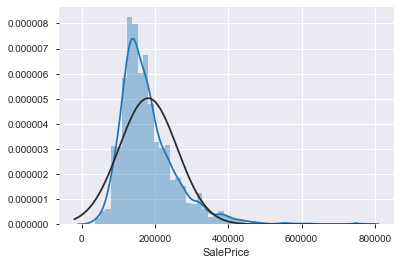

In [30]:
understand_numeric_column(train,"SalePrice")

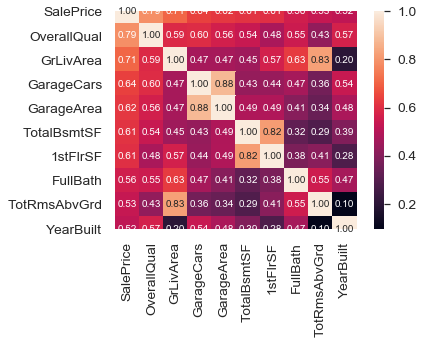

In [31]:
find_top_N_Correlated_Feature(10,'SalePrice',train)

### Numerical Features

- 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
- 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
- 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').
'FullBath'?? Really?
- 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. Is this dataset from Chernobyl?
- Ah... 'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Honestly, it scares me to think about 'YearBuilt' because I start feeling that we should do a little bit of time-series analysis to get this right. I'll leave this as a homework for you.

/Users/home/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


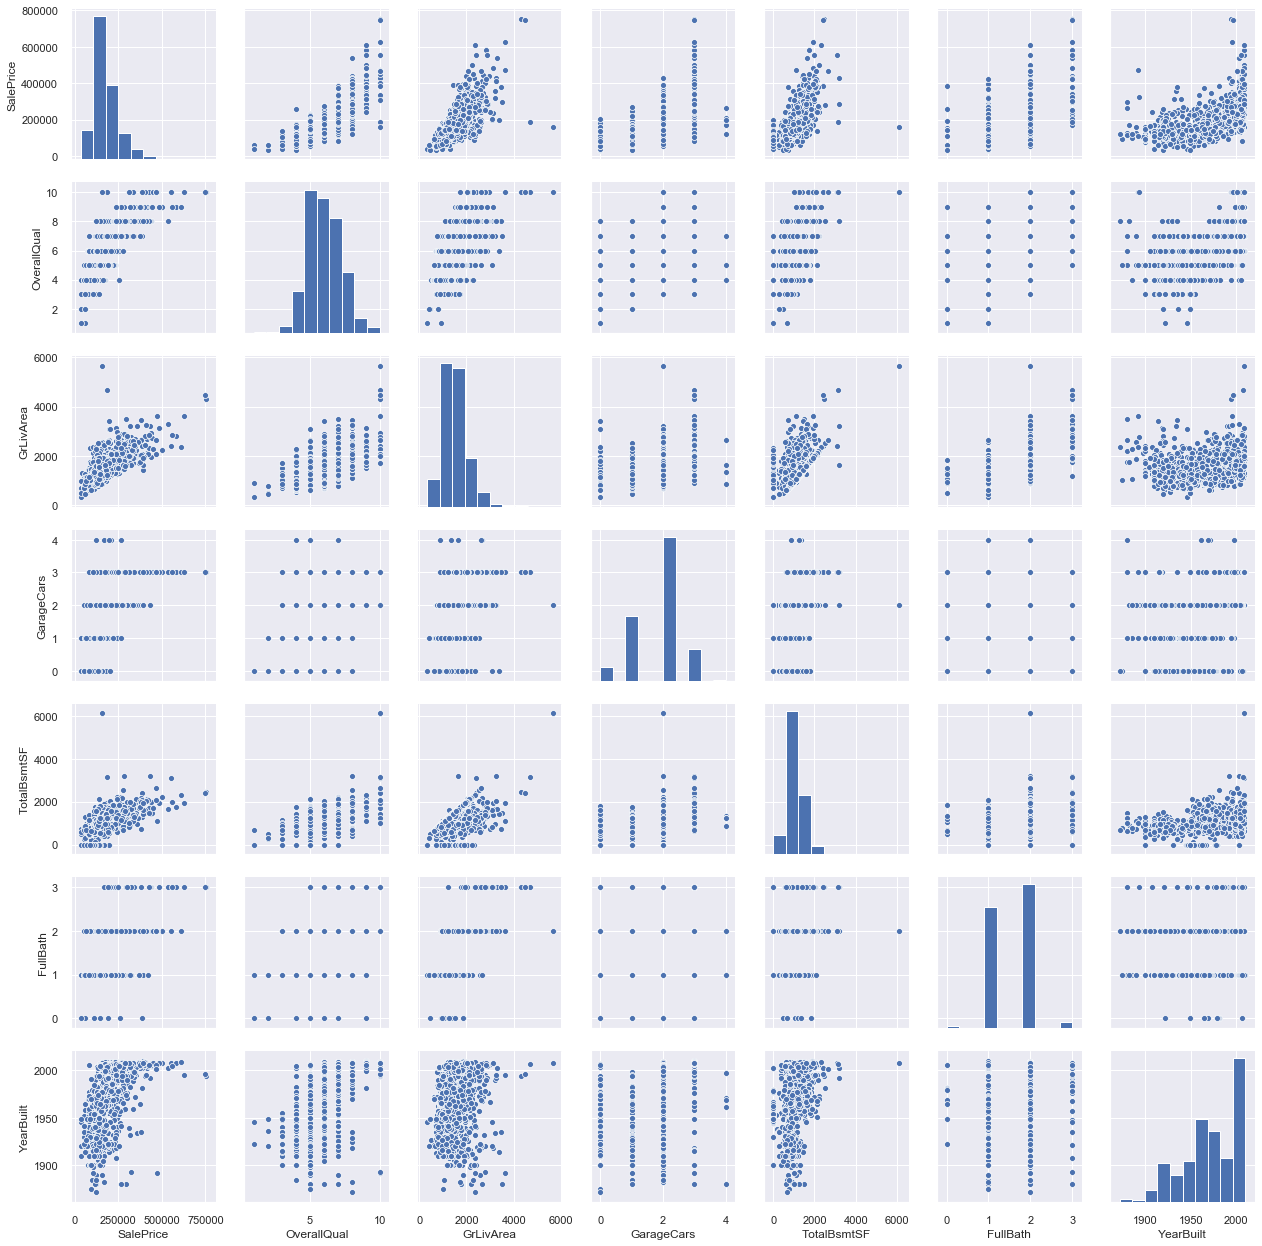

In [14]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

##### Missing Value Treatment

In [111]:
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1, keys=["Total","Percent"])
#dealing with missing data
train = train.drop((missing_data[missing_data['Total'] > 81]).index,1)
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())


# Treating Categorical Column

In [9]:
train["MSZoning"].value_counts()
RL--->0
RM--->1
Fv--->65
RH--->10

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [10]:
# Categorical boolean mask
categorical_feature_mask = train.dtypes==object
# filter categorical columns using mask and turn it into alist
categorical_cols = train.columns[categorical_feature_mask].tolist()
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train[categorical_cols] = train[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [12]:
train["MSZoning"].value_counts()

3    1151
4     218
1      65
2      16
0      10
Name: MSZoning, dtype: int64

In [124]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null int64
LotArea          1460 non-null int64
Street           1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
Utilities        1460 non-null int64
LotConfig        1460 non-null int64
LandSlope        1460 non-null int64
Neighborhood     1460 non-null int64
Condition1       1460 non-null int64
Condition2       1460 non-null int64
BldgType         1460 non-null int64
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null int64
RoofMatl         1460 non-null int64
Exterior1st      1460 non-null int64
Exterior2nd      1460 non-null int64
MasVnrType       1460 non-null int64
MasVn

# Model Building

In [ ]:
- split  data
- import pckg
- create an obj
- fit()----->train
- predict()----->test

In [13]:
train.shape

(1460, 81)

In [16]:
1460*0.30

438.0

In [31]:
# Spilt the data

X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis=1), train['SalePrice'], test_size=0.3)


In [32]:
train.loc[845]

Id                  846.0
MSSubClass           85.0
MSZoning              3.0
LotFrontage           NaN
LotArea           16647.0
Street                1.0
Alley                 2.0
LotShape              0.0
LandContour           3.0
Utilities             0.0
LotConfig             1.0
LandSlope             0.0
Neighborhood         19.0
Condition1            5.0
Condition2            2.0
BldgType              0.0
HouseStyle            6.0
OverallQual           5.0
OverallCond           5.0
YearBuilt          1975.0
YearRemodAdd       1981.0
RoofStyle             1.0
RoofMatl              1.0
Exterior1st           6.0
Exterior2nd           6.0
MasVnrType            2.0
MasVnrArea            0.0
ExterQual             3.0
ExterCond             4.0
Foundation            1.0
BsmtQual              2.0
BsmtCond              3.0
BsmtExposure          1.0
BsmtFinType1          0.0
BsmtFinSF1         1390.0
BsmtFinType2          5.0
BsmtFinSF2            0.0
BsmtUnfSF             0.0
TotalBsmtSF 

In [33]:
X_train.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1167,1168,60,3,58.0,10852,1,2,0,3,0,4,0,8,6,2,0,5,6,5,2000,2000,1,1,12,13,2,0.0,3,4,2,2,3,3,2,786,5,0,173,959,1,0,1,4,959,712,0,1671,1,0,2,1,3,1,3,7,6,1,4,1,2000.0,0,2,472,4,4,2,0,38,0,0,0,0,3,4,4,0,2,2006,8,4


In [97]:
def Standardize_Data(DataFrame):

    """Standardize the data"""
    std = StandardScaler()
    std_data=std.fit_transform(DataFrame)
    
    print("-------------------")
    print("")
    print("standardized the data")
    print("The mean of the col is",std_data.mean())
    print("")
    print("The std of the col is",std_data.std())
    return std_data

In [34]:
X_train.shape

(1022, 80)

In [100]:
X_train

array([[ 1.37391375,  2.5236405 ,  0.31454703, ...,  0.46520725,
         0.58626866,  0.07421157],
       [-1.53923947, -0.2856721 ,  0.31454703, ..., -0.54640203,
        -0.97000815, -1.01837681],
       [ 0.64562544, -0.01580724,  0.31454703, ...,  1.2660646 ,
        -0.97000815, -1.01837681],
       ...,
       [-0.08266286,  0.08903234,  0.31454703, ...,  0.04370339,
         0.58626866, -0.83476756],
       [ 0.64562544,  0.03855402,  0.31454703, ...,  1.09746305,
         0.58626866,  1.86950201],
       [-0.81095116, -0.70308897, -1.02489906, ..., -0.84145473,
        -0.97000815,  1.58388762]])

In [96]:
 y_train.head(1)

1312    302000
Name: SalePrice, dtype: int64

In [ ]:
--- Pipeline

In [30]:

# lm = LinearRegression()
# lm.fit(X_train,y_train)
# print(lm)


In [71]:
print(lm.intercept_)

[6.60022817e-17]


In [72]:
print(lm.coef_)

[[ 0.29434388  0.31107005  0.05109985  0.06398884  0.11932473  0.02209143
  -0.044909    0.0334707   0.07675313  0.09456834  0.05714788  0.01910605
   0.04584189  0.1392006 ]]


In [75]:


predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(the intercept)? (<ipython-input-75-2222617548d1>, line 1)

In [76]:
predictions

array([[ 1.08158064e+00],
       [-5.22409433e-01],
       [-4.73891578e-01],
       [ 2.25752881e+00],
       [ 2.23491757e+00],
       [-1.04462077e+00],
       [-6.20003048e-01],
       [-1.98096122e-01],
       [-1.69294592e-01],
       [-2.17118468e-01],
       [-8.78682945e-01],
       [-2.98226907e-01],
       [-6.81484611e-01],
       [ 2.40142906e-01],
       [-1.77255708e-01],
       [ 1.36076715e-01],
       [-2.02061592e-01],
       [-8.56389547e-01],
       [-3.09974379e-01],
       [ 7.05664814e-01],
       [-2.50871169e-01],
       [-1.58838598e+00],
       [ 1.62866354e-01],
       [-1.66735241e-01],
       [ 5.01358040e-01],
       [-4.47582851e-01],
       [-8.33849307e-01],
       [ 2.33598982e-01],
       [ 2.36837584e-01],
       [-9.09636590e-01],
       [ 5.25662731e-01],
       [-3.26277676e-02],
       [-7.37717675e-02],
       [ 1.25190996e+00],
       [-2.75549710e+00],
       [-1.39880679e+00],
       [ 2.32770272e+00],
       [ 5.38747177e-01],
       [-1.0

In [36]:
y_test

202     112000
781     175900
356     173000
1131     93500
620      67000
         ...  
369     162000
627     153000
340     202900
921     145900
1029    118000
Name: SalePrice, Length: 438, dtype: int64

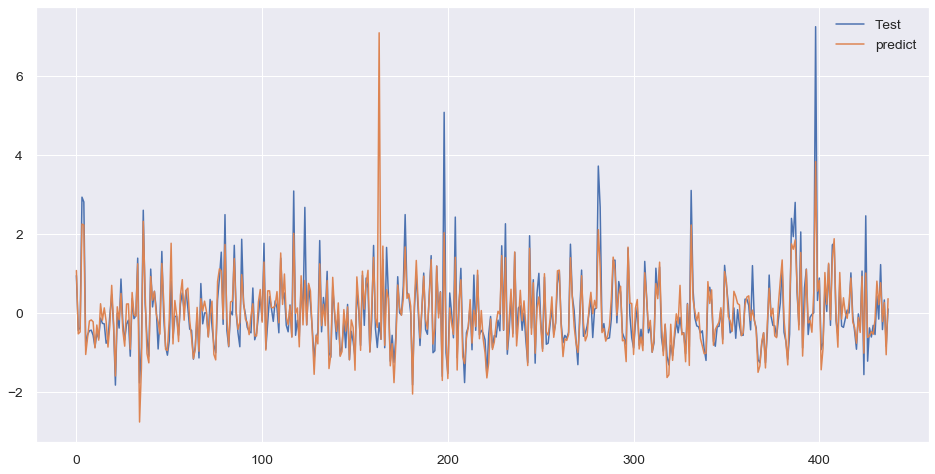

In [77]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(predictions, label = 'predict')
plt.legend()
plt.show()

In [45]:
from sklearn import metrics


In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 0.29105407971784336
MSE: 0.29995756024517595
RMSE: 0.5476838141164808


### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))


MAE: 0.3327904077116327
MSE: 0.2297983841710415
RMSE: 0.4793729072142496


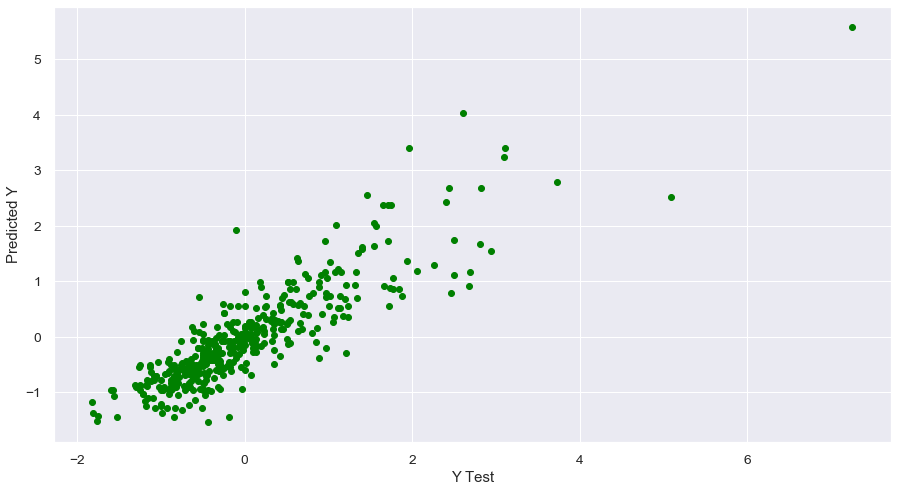

In [48]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

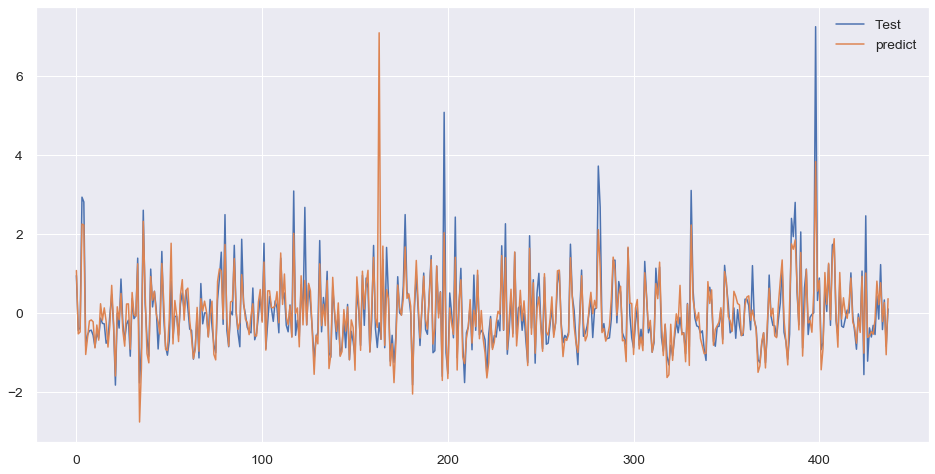

In [49]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(predictions, label = 'predict')
plt.legend()
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 500, random_state = 0)
rfr.fit(X_train, y_train)
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))


In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,rfr_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()


In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(rfr_pred, label = 'predict')
plt.show()


# Creating Machine Learning Pipeline

In [ ]:
import sklearn.linear_model import LinearRegression
import sklearn.ensemble import RandomForestRegressor
param_grid_lr=[{}]
param_grid_rf= [{'n_estimators':[3,10,30,100,200], 'max_features':[2,4,6], 'leaf_node':[4,5,6,7,8]}]
grid_search_lr=GridSearchCV(LinearRegression(),param_grid_lr,scoring='neg_mean_squared_error', cv=5)
grid_search_lr.fit(X_train, Y_train)
print(grid_search_lr.best_params_)